<a href="https://colab.research.google.com/github/Souvik0651/Cardiovascular-Risk-Prediction--classification-/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Statement**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# Data Description
Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project3-clasiffication/data_cardiovascular_risk.csv')

In [4]:
df.head(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


In [5]:
df.tail(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [164]:
df.shape

(3390, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [8]:
df.drop('education',axis='columns',inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 423.9+ KB


In [10]:
def visulaise(ax):
  for p in ax.patches:
    # print(p)
    number = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(number, (x, y),ha='center')
plt.show()

Text(0.5, 1.0, 'Total TenyearCHD')

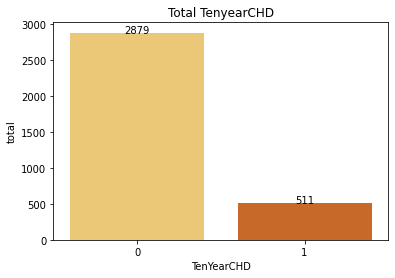

In [11]:
visulaise(sns.countplot(x='TenYearCHD',data=df,palette="YlOrBr"))
plt.ylabel('total')
plt.title('Total TenyearCHD')

Text(0.5, 1.0, 'Total Males and females')

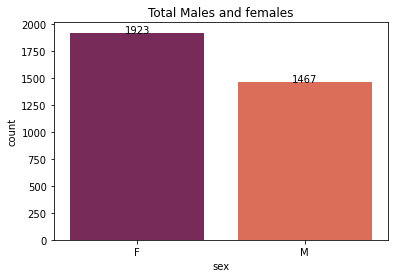

In [12]:
visulaise(sns.countplot(x='sex',data=df,palette="rocket"))
plt.title('Total Males and females')

In [13]:
df.columns

Index(['id', 'age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Text(0.5, 1.0, 'Total Males and females with and without Ten year CHD')

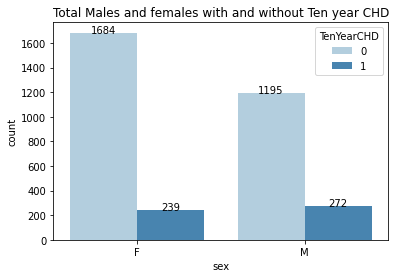

In [14]:
visulaise(sns.countplot(x='sex',hue='TenYearCHD',data=df,palette="Blues"))
plt.title('Total Males and females with and without Ten year CHD')

Text(0.5, 1.0, 'Ten Year CHD with different ages')

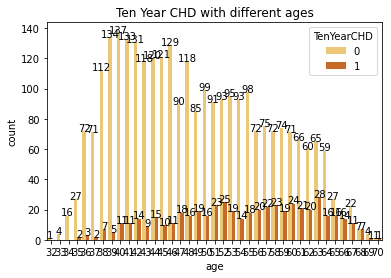

In [15]:
visulaise(sns.countplot(x='age',hue='TenYearCHD',data=df,palette="YlOrBr"))
plt.title('Ten Year CHD with different ages')

Text(0.5, 1.0, 'People who smokes')

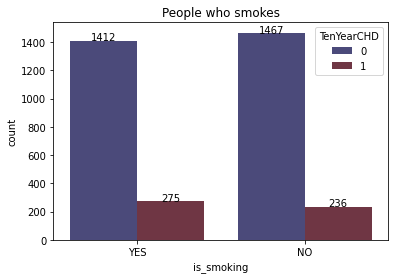

In [16]:
visulaise(sns.countplot(x='is_smoking',hue='TenYearCHD',data=df,palette="icefire"))
plt.title('People who smokes')

Text(0.5, 1.0, 'the patient had previously had a stroke')

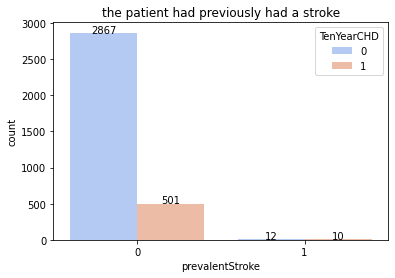

In [17]:
visulaise(sns.countplot(x='prevalentStroke',hue='TenYearCHD',data=df,palette="coolwarm"))
plt.title('the patient had previously had a stroke')

Text(0.5, 1.0, 'the patient was hypertensive')

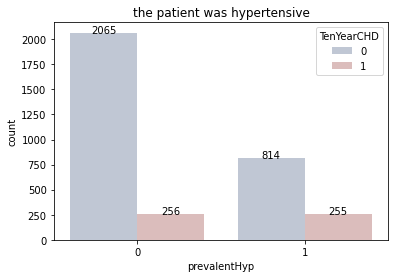

In [18]:
visulaise(sns.countplot(x='prevalentHyp',hue='TenYearCHD',data=df,palette="vlag"))
plt.title('the patient was hypertensive')

Text(0.5, 1.0, 'the patient had diabetes')

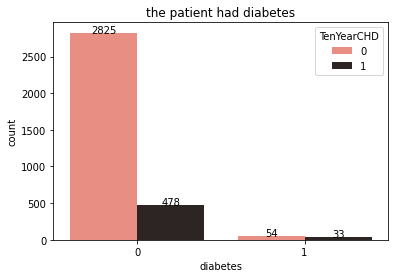

In [19]:
visulaise(sns.countplot(x='diabetes',hue='TenYearCHD',data=df,palette="dark:salmon_r"))
plt.title('the patient had diabetes')

In [20]:
df.is_smoking.unique()

array(['YES', 'NO'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
lb_encod = LabelEncoder()

In [23]:
df.sex=lb_encod.fit_transform(df.sex)

In [24]:
df.is_smoking=lb_encod.fit_transform(df.is_smoking)

In [25]:
# in sex column female is 0 & male is 1 and is_smoking 1=yes 0=no
df.head(3)

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


In [26]:
df.tail(30)

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3360,3360,56,1,0,0.0,0.0,0,1,0,241.0,130.0,85.0,25.79,68.0,78.0,0
3361,3361,42,0,0,0.0,0.0,0,1,0,230.0,142.5,97.5,29.94,75.0,75.0,0
3362,3362,48,1,0,0.0,0.0,0,0,0,206.0,118.0,81.0,28.13,72.0,87.0,0
3363,3363,45,1,1,23.0,0.0,0,0,0,263.0,115.0,76.0,24.94,68.0,78.0,0
3364,3364,62,0,0,0.0,0.0,0,1,0,268.0,143.5,90.0,29.64,88.0,83.0,0
3365,3365,55,0,0,0.0,0.0,0,0,0,310.0,135.0,76.5,26.31,110.0,74.0,0
3366,3366,43,0,1,20.0,0.0,0,0,0,201.0,129.0,92.0,24.54,88.0,63.0,0
3367,3367,59,1,1,20.0,0.0,0,1,0,206.0,187.0,97.0,26.00,100.0,69.0,0
3368,3368,40,1,1,25.0,0.0,0,0,0,258.0,112.0,78.0,28.57,80.0,70.0,0
3369,3369,44,0,1,5.0,0.0,0,0,0,205.0,120.0,83.5,24.30,67.0,77.0,0


In [27]:
df.columns

Index(['id', 'age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 423.9 KB


In [29]:
df.describe()

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,0.432743,0.497640,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,0.495529,0.500068,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [30]:
df.cigsPerDay.fillna(df.cigsPerDay.median(),inplace=True)
df.cigsPerDay=df.cigsPerDay.astype('int')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   int64  
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 423.9 KB


In [32]:
df.BPMeds .unique()

array([ 0., nan,  1.])

In [33]:
df.BPMeds=df.BPMeds.fillna(df.BPMeds.mode()[0])
df.BPMeds=df.BPMeds.astype('int')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   int64  
 5   BPMeds           3390 non-null   int64  
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(6), int64(10)
memory usage: 423.9 KB


In [35]:
df.totChol=df.totChol.fillna(df.totChol.median())
df.totChol=df.totChol.astype('int')

In [36]:
df.BMI=df.BMI.fillna(df.BMI.median())

In [37]:
df.heartRate.unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47.,  nan, 125., 105., 122.,
        51., 140.,  97.])

In [38]:
df.drop(df[df.heartRate.isna()].index,inplace=True)
df.heartRate=df.heartRate.astype('int')

In [39]:
df.glucose.fillna(df.glucose.median(),inplace=True)

In [40]:
df.glucose=df.glucose.astype('int')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3389 non-null   int64  
 1   age              3389 non-null   int64  
 2   sex              3389 non-null   int64  
 3   is_smoking       3389 non-null   int64  
 4   cigsPerDay       3389 non-null   int64  
 5   BPMeds           3389 non-null   int64  
 6   prevalentStroke  3389 non-null   int64  
 7   prevalentHyp     3389 non-null   int64  
 8   diabetes         3389 non-null   int64  
 9   totChol          3389 non-null   int64  
 10  sysBP            3389 non-null   float64
 11  diaBP            3389 non-null   float64
 12  BMI              3389 non-null   float64
 13  heartRate        3389 non-null   int64  
 14  glucose          3389 non-null   int64  
 15  TenYearCHD       3389 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 450.1 KB


In [42]:
df.corr()

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016921,0.001110,-0.001418,-0.018029,0.006998,-0.038881,0.013376,0.003675,-0.019830,0.019851,0.000771,0.039822,0.024684,0.014225,0.010094
age,0.016921,1.000000,-0.042477,-0.211615,-0.191937,0.122252,0.059103,0.308322,0.108001,0.272281,0.404316,0.222328,0.137127,-0.002596,0.112245,0.224028
sex,0.001110,-0.042477,1.000000,0.215219,0.329144,-0.043141,-0.011248,0.002575,0.008910,-0.069921,-0.037999,0.059077,0.086831,-0.118702,-0.003152,0.083931
is_smoking,-0.001418,-0.211615,0.215219,1.000000,0.763227,-0.037487,-0.043686,-0.119818,-0.053293,-0.046893,-0.146343,-0.124149,-0.173004,0.062185,-0.059482,0.033472
cigsPerDay,-0.018029,-0.191937,0.329144,0.763227,1.000000,-0.035691,-0.041561,-0.078365,-0.048082,-0.025260,-0.100805,-0.068183,-0.100039,0.066253,-0.066471,0.067551
BPMeds,0.006998,0.122252,-0.043141,-0.037487,-0.035691,1.000000,0.116179,0.257051,0.070925,0.080899,0.260601,0.198760,0.087702,0.018103,0.061379,0.087545
prevalentStroke,-0.038881,0.059103,-0.011248,-0.043686,-0.041561,0.116179,1.000000,0.071710,0.010111,-0.010779,0.057638,0.047223,0.017054,-0.019184,0.023672,0.068741
prevalentHyp,0.013376,0.308322,0.002575,-0.119818,-0.078365,0.257051,0.071710,1.000000,0.082663,0.158922,0.699061,0.613418,0.299372,0.150815,0.082817,0.165703
diabetes,0.003675,0.108001,0.008910,-0.053293,-0.048082,0.070925,0.010111,0.082663,1.000000,0.059177,0.124156,0.061138,0.087843,0.039742,0.609779,0.103881
totChol,-0.019830,0.272281,-0.069921,-0.046893,-0.025260,0.080899,-0.010779,0.158922,0.059177,1.000000,0.198158,0.153761,0.113567,0.086947,0.060963,0.093966


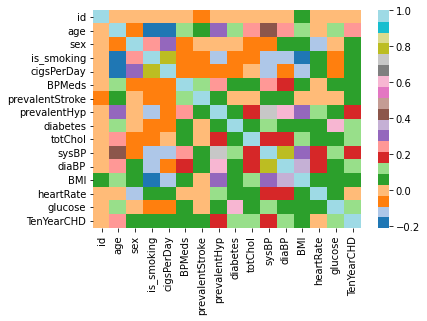

In [43]:
sns.heatmap(data=df.corr(),cmap='tab20')

In [44]:
df.head(2)

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,0,1,3,0,0,0,0,221,148.0,85.0,25.38,90,80,1
1,1,36,1,0,0,0,0,1,0,212,168.0,98.0,29.77,72,75,0


In [45]:
# we can see id & heartrate has 0 correlation with Ten Year CHD which is dependent variable
df.drop(['id','heartRate'],axis='columns',inplace=True)

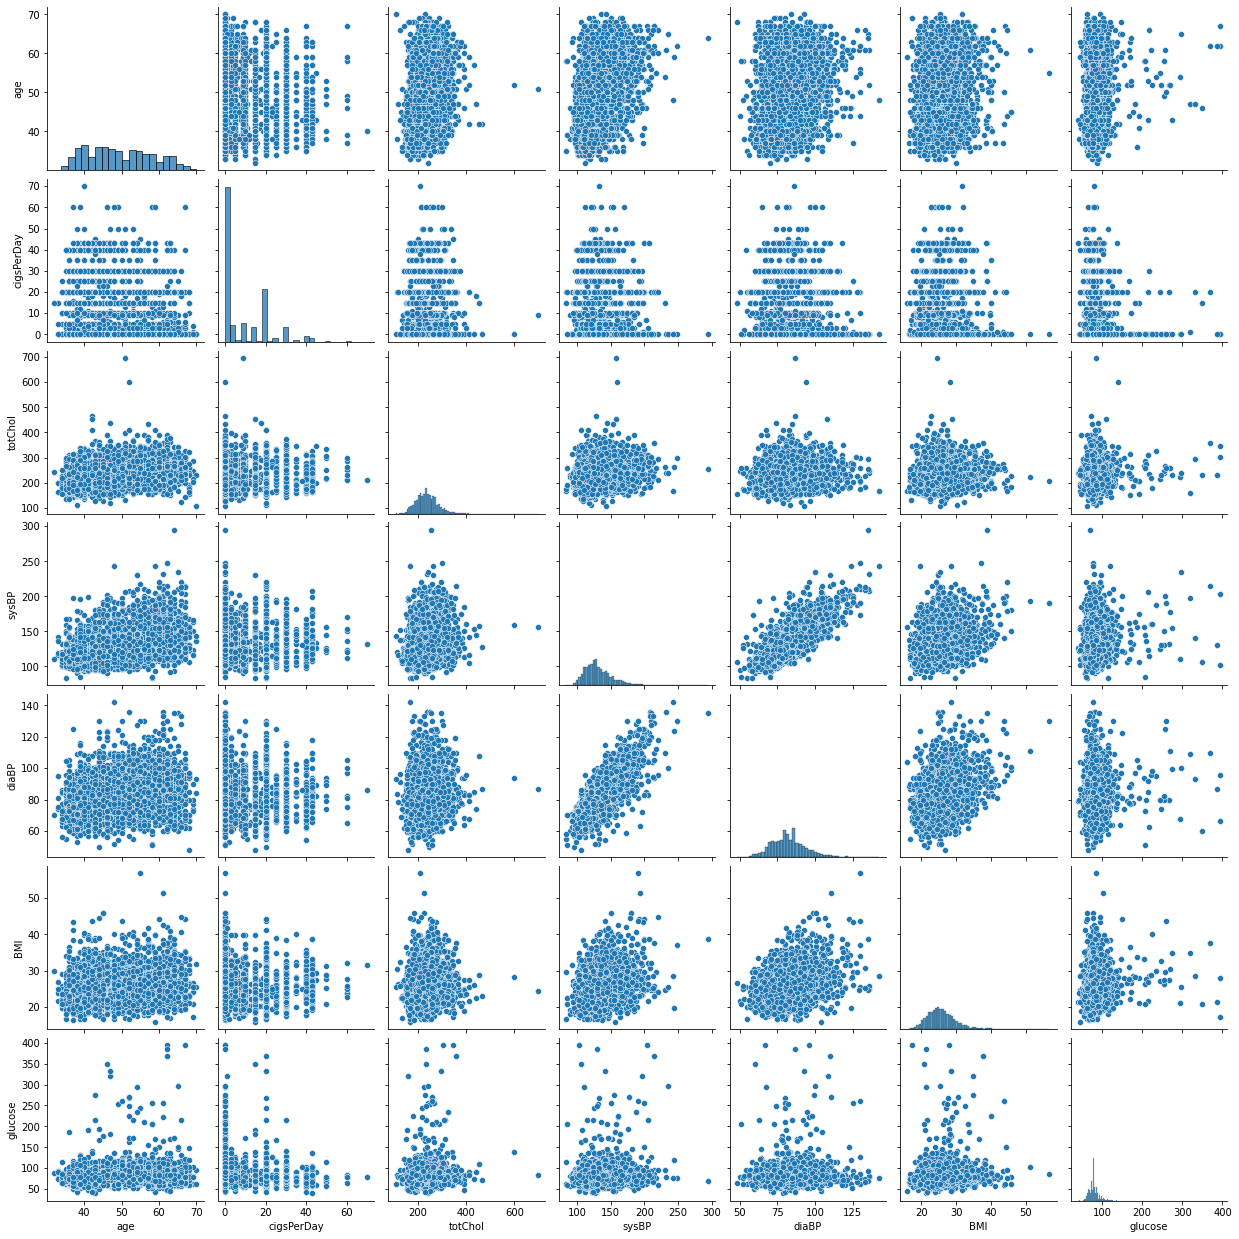

In [46]:
subData = df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','glucose']]
sns.pairplot(subData)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


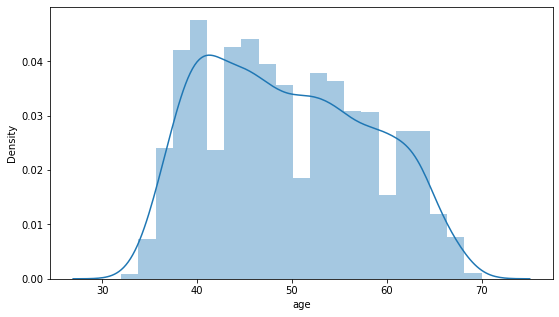

In [47]:
plt.rcParams['figure.figsize']=(9,5)
sns.distplot(df['age'])

In [48]:
df.sex.replace({0:'Male',1:'Female'})

0         Male
1       Female
2         Male
3       Female
4         Male
         ...  
3385      Male
3386      Male
3387    Female
3388    Female
3389      Male
Name: sex, Length: 3389, dtype: object

In [49]:
df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,64,0,1,3,0,0,0,0,221,148.0,85.0,25.38,80,1
1,36,1,0,0,0,0,1,0,212,168.0,98.0,29.77,75,0
2,46,0,1,10,0,0,0,0,250,116.0,71.0,20.35,94,0
3,50,1,1,20,0,0,1,0,233,158.0,88.0,28.26,94,1
4,64,0,1,30,0,0,0,0,241,136.5,85.0,26.42,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0,0,0,0,0,0,0,261,123.5,79.0,29.28,103,0
3386,46,0,0,0,0,0,0,0,199,102.0,56.0,21.96,84,0
3387,44,1,1,3,0,0,1,0,352,164.0,119.0,28.92,72,1
3388,60,1,0,0,0,0,1,0,191,167.0,105.0,23.01,85,0


In [50]:
df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'glucose', 'TenYearCHD'],
      dtype='object')

In [51]:
depnd= df.TenYearCHD

In [52]:
indpnd= df.drop('TenYearCHD',axis='columns')

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaled= StandardScaler()

In [55]:
scaled_indpnd=scaled.fit_transform(indpnd)

In [56]:
scaled_indpnd

array([[ 1.68373495, -0.87312685,  1.00502887, ...,  0.17588518,
        -0.10037995, -0.074148  ],
       [-1.57613971,  1.14530896, -0.99499629, ...,  1.25716244,
         0.96863447, -0.29003079],
       [-0.41189876, -0.87312685,  1.00502887, ..., -0.98856725,
        -1.32524158,  0.53032382],
       ...,
       [-0.64474695,  1.14530896,  1.00502887, ...,  3.00384109,
         0.7616499 , -0.41956046],
       [ 1.21803857,  1.14530896, -0.99499629, ...,  1.83938865,
        -0.67750163,  0.14173479],
       [ 0.519494  , -0.87312685, -0.99499629, ..., -0.48951621,
         0.9954207 ,  0.4439707 ]])

In [57]:
depnd.value_counts()

0    2879
1     510
Name: TenYearCHD, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
 from sklearn.metrics import confusion_matrix 

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(scaled_indpnd,depnd,test_size=0.2,stratify=depnd,random_state=0)

In [61]:
xtrain.shape

(2711, 13)

In [62]:
xtest.shape

(678, 13)

In [63]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

In [64]:
from sklearn.model_selection import cross_val_score 

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
from sklearn import linear_model

In [67]:
LR.fit(xtrain,ytrain)

LogisticRegression()

In [68]:
LR_ypred=LR.predict(xtest)

In [69]:
ytest

1841    0
3332    0
1299    1
1280    0
1414    0
       ..
1341    0
960     0
2451    0
2194    0
473     0
Name: TenYearCHD, Length: 678, dtype: int64

In [70]:
LR.score(xtest,ytest)

0.8539823008849557

In [71]:
LR.score(xtrain,ytrain)

0.8594614533382515

In [72]:
roc_auc_score(ytest,LR_ypred)

0.5389093137254902

In [73]:
from sklearn.linear_model import RidgeClassifier

In [74]:
Ridge=RidgeClassifier(alpha=50,max_iter=100)

In [75]:
cross_val_score(Ridge,indpnd,depnd,cv=5).mean()

0.8530533369934161

In [76]:
Ridge.fit(xtrain,ytrain)

RidgeClassifier(alpha=50, max_iter=100)

In [77]:
Ridge_ypred=Ridge.predict(xtest)

In [78]:
Ridge.score(xtrain,ytrain)

0.8539284396901512

In [79]:
Ridge.score(xtest,ytest)

0.8539823008849557

In [80]:
roc_auc_score(ytest,Ridge_ypred)

0.5227736928104576

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
KNN=KNeighborsClassifier()

In [84]:
k_range=range(1,31)
param_grid=dict(n_neighbors=k_range)
KNN=GridSearchCV(KNN, param_grid ,scoring = 'roc_auc',cv=10)

In [85]:
KNN.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='roc_auc')

In [86]:
KNN.best_params_

{'n_neighbors': 29}

In [87]:
KNN.best_score_

0.6836302637800517

In [88]:
KNN_ypred=KNN.predict(xtest)

In [89]:
KNN.score(xtrain,ytrain)

0.7583730300630891

In [90]:
KNN.score(xtest,ytest)

0.6367783224400873

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [92]:
DC= DecisionTreeClassifier()

In [93]:
Dt=range(1,100)
param_distributions=dict(max_depth=Dt)
DC=RandomizedSearchCV(DC,param_distributions,scoring='roc_auc',cv=10)

In [94]:
DC.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 100)},
                   scoring='roc_auc')

In [95]:
DC.best_params_

{'max_depth': 10}

In [96]:
DC.best_score_

0.5854700102831067

In [97]:
DC_ypred=KNN.predict(xtest)

In [98]:
from sklearn.ensemble import BaggingClassifier

In [99]:
bag_model = BaggingClassifier(
    base_estimator=DC, 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=RandomizedSearchCV(cv=10,
                                                    estimator=DecisionTreeClassifier(),
                                                    param_distributions={'max_depth': range(1, 100)},
                                                    scoring='roc_auc'),
                  max_samples=0.8, n_estimators=100, oob_score=True,
                  random_state=0)

In [100]:
bag_ypred=bag_model.predict(xtest)

In [101]:
bag_model.score(xtrain,ytrain)

0.9955735890815197

In [102]:
bag_model.score(xtest,ytest)

0.8569321533923304

In [103]:
bag_model_ypred=bag_model.predict(xtest)

In [104]:
roc_auc_score(ytest,bag_ypred)

0.5446793300653595

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
RFC= RandomForestClassifier()

In [107]:
k_range=range(1,500)
depth_range=range(1,20)
param_distributions =dict(n_estimators=k_range,max_depth=depth_range)
RFC=RandomizedSearchCV(RFC, param_distributions ,scoring = 'roc_auc',cv=10)

In [108]:
RFC.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 20),
                                        'n_estimators': range(1, 500)},
                   scoring='roc_auc')

In [109]:
RFC_ypred= RFC.predict(xtest)

In [110]:
RFC.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=256)

In [111]:
RFC.best_score_

0.7143891191876346

In [112]:
RFC.score(xtest,ytest)

0.6897637527233116

In [113]:
RFC.score(xtrain,ytrain)

0.8980230390028352

In [114]:
from sklearn.metrics import roc_auc_score

In [115]:
roc_auc_score(ytest,RFC_ypred)

0.5299734477124183

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

In [118]:
sm=SMOTE()

In [119]:
sm_indpnd,sm_depnd=sm.fit_resample(scaled_indpnd,depnd)

In [120]:
Counter(depnd)

Counter({1: 510, 0: 2879})

In [121]:
Counter(sm_depnd)

Counter({1: 2879, 0: 2879})

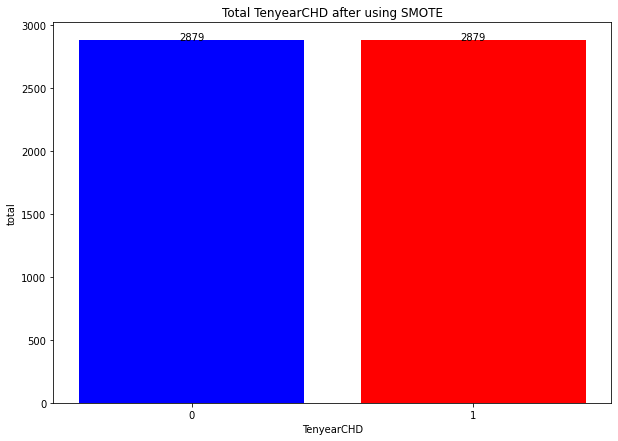

In [122]:
x=list(Counter(sm_depnd).keys())
y=list(Counter(sm_depnd).values())
fig, ax =  plt.subplots(figsize = (10, 7))
ax.bar(x, y,color=['r','b'])
for p in ax.patches:
    # print(p)
    number = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(number, (x, y),ha='center')
    plt.xticks(np.arange(0,2))
    plt.ylabel('total')
    plt.xlabel('TenyearCHD')
plt.title('Total TenyearCHD after using SMOTE')
plt.show()

In [123]:
xtrain_sm,xtest_sm,ytrain_sm,ytest_sm=train_test_split(sm_indpnd,sm_depnd,test_size=0.2,stratify=sm_depnd,random_state=0)

In [124]:
RFC_sm= RandomForestClassifier()
k_range=range(1,500)
depth_range=range(1,20)
param_distributions =dict(n_estimators=k_range,max_depth=depth_range)
RFC_sm=RandomizedSearchCV(RFC_sm, param_distributions ,scoring = 'roc_auc',cv=10)
RFC_sm.fit(xtrain_sm,ytrain_sm)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 20),
                                        'n_estimators': range(1, 500)},
                   scoring='roc_auc')

In [125]:
RFC_sm.best_params_

{'n_estimators': 234, 'max_depth': 15}

In [126]:
RFC_sm.best_score_

0.9350010311050008

In [127]:
RFC_sm.score(xtrain_sm,ytrain_sm)

0.9999717184385787

In [128]:
RFC_sm.score(xtest_sm,ytest_sm)

0.9468768084490741

In [129]:
RFC_sm_ypred=RFC_sm.predict(xtest_sm)

In [130]:
roc_auc_score(ytest_sm,RFC_sm_ypred)

0.8689236111111112

In [131]:
KNN_sm=KNeighborsClassifier()
k_range=range(1,35)
param_grid=dict(n_neighbors=k_range)
KNN_sm=GridSearchCV(KNN_sm,param_grid,scoring='roc_auc',cv=10)

In [132]:
KNN_sm.fit(xtrain_sm,ytrain_sm)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 35)}, scoring='roc_auc')

In [133]:
KNN_sm.best_params_

{'n_neighbors': 3}

In [134]:
KNN_sm.best_score_

0.895715832371787

In [135]:
KNN_sm.score(xtrain_sm,ytrain_sm)

0.9900073701749064

In [136]:
KNN_sm.score(xtest_sm,ytest_sm)

0.9129171489197531

In [137]:
train_pred=KNN_sm.predict(xtrain_sm)

In [138]:
KNN_sm_ypred=KNN_sm.predict(xtest_sm)

In [139]:
roc_auc_score(ytrain_sm,train_pred)

0.9033868866695615

In [140]:
roc_auc_score(ytest_sm,KNN_sm_ypred)

0.849826388888889

In [141]:
from sklearn.svm import SVC

In [142]:
svm_sm=SVC()
param_distributions = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
              
svm_sm=RandomizedSearchCV(svm_sm,param_distributions,scoring='roc_auc',cv=10) 

In [143]:
svm_sm.fit(xtrain_sm,ytrain_sm)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                   scoring='roc_auc')

In [144]:
svm_sm.best_params_

{'gamma': 0.1, 'C': 1000}

In [145]:
svm_sm.best_score_

0.8858290247874369

In [146]:
svm_sm_ypred=svm_sm.predict(xtest_sm)

In [147]:
roc_auc_score(ytest_sm,svm_sm_ypred)

0.8706597222222223

In [148]:
from xgboost import XGBClassifier

In [149]:
XG_model= XGBClassifier()

In [150]:
XG_model.fit(xtrain,ytrain)

XGBClassifier()

In [151]:
XG_model.fit(xtrain_sm,ytrain_sm)

XGBClassifier()

In [152]:
cross_val_score(XG_model,indpnd,depnd,cv=10).mean()

0.8512803058071949

In [153]:
XG_model.score(xtrain,ytrain)

0.7783105864994467

In [154]:
XG_model.score(xtest,ytest)

0.7418879056047197

In [155]:
XG_ypred=XG_model.predict(xtest)

In [156]:
roc_auc_score(ytest,XG_ypred)

0.6584967320261437

In [157]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [158]:
from sklearn import metrics

In [159]:
models=[LR,Ridge,KNN,DC,RFC,bag_model,XG_model,KNN_sm,RFC_sm,svm_sm]
pred=[LR_ypred,Ridge_ypred,KNN_ypred,DC_ypred,RFC_ypred,bag_model_ypred,XG_ypred,KNN_sm_ypred,RFC_sm_ypred,svm_sm_ypred]
test=[ytest,ytest_sm]
name=['Logistic Regression', 'Ridge Regularisation','KNeighborsClassifier' , 'DecisionTreeClassifier','RandomForestClassifier',
      'BaggingClassifier','XGBClassifier','KNeighborsClassifier using smote', 'RandomForestClassifier using smote', 'SVM Classifier using smote']
for i in range(len(models)):
  for j in str(i):
    if i<7:
      print(name[i]+' '+ 'confusion matrix')
      print(confusion_matrix(test[0],pred[int(j)]))
      print(name[i]+' '+ 'precision_score', precision_score(test[0],pred[int(j)]))
      print(name[i]+' '+ 'recall_score',recall_score(test[0],pred[int(j)]))
      print(name[i]+' '+ 'f1_score',f1_score(test[0],pred[int(j)]))
      print(name[i]+' '+ 'roc_auc_score',roc_auc_score(test[0],pred[int(j)]))
      print('')
    else:
      print(name[i]+' '+ 'confusion matrix')
      print(confusion_matrix(test[1],pred[int(j)]))
      print(name[i]+' '+ 'precision_score', precision_score(test[1],pred[int(j)]))
      print(name[i]+' '+ 'recall_score',recall_score(test[1],pred[int(j)]))
      print(name[i]+' '+ 'f1_score',f1_score(test[1],pred[int(j)]))
      print(name[i]+' '+ 'roc_auc_score',roc_auc_score(test[1],pred[int(j)]))
      print('')

Logistic Regression confusion matrix
[[570   6]
 [ 93   9]]
Logistic Regression precision_score 0.6
Logistic Regression recall_score 0.08823529411764706
Logistic Regression f1_score 0.15384615384615385
Logistic Regression roc_auc_score 0.5389093137254902

Ridge Regularisation confusion matrix
[[574   2]
 [ 97   5]]
Ridge Regularisation precision_score 0.7142857142857143
Ridge Regularisation recall_score 0.049019607843137254
Ridge Regularisation f1_score 0.09174311926605504
Ridge Regularisation roc_auc_score 0.5227736928104576

KNeighborsClassifier confusion matrix
[[575   1]
 [101   1]]
KNeighborsClassifier precision_score 0.5
KNeighborsClassifier recall_score 0.00980392156862745
KNeighborsClassifier f1_score 0.019230769230769232
KNeighborsClassifier roc_auc_score 0.5040339052287581

DecisionTreeClassifier confusion matrix
[[575   1]
 [101   1]]
DecisionTreeClassifier precision_score 0.5
DecisionTreeClassifier recall_score 0.00980392156862745
DecisionTreeClassifier f1_score 0.019230769